**LIBRARY**

----

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, KFold

from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LogisticRegression, Ridge

from sklearn.metrics import roc_curve, auc, roc_auc_score

from tqdm.auto import tqdm

**DATA PREPARATION**

------------------------------------------------------------------------------

In [2]:
!wget --no-check-certificate https://raw.githubusercontent.com/madityarafip/My-Machine-Learning/main/Dataset/CreditScoring.csv

--2021-10-05 12:06:05--  https://raw.githubusercontent.com/madityarafip/My-Machine-Learning/main/Dataset/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: 'CreditScoring.csv.2'

     0K .......... .......... .......... .......... .......... 28% 1.39M 0s
    50K .......... .......... .......... .......... .......... 56% 1.91M 0s
   100K .......... .......... .......... .......... .......... 84%  606K 0s
   150K .......... .......... ........                        100%  861K=0.2s

2021-10-05 12:06:06 (1013 KB/s) - 'CreditScoring.csv.2' saved [182489/182489]



In [3]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()
df.head(3)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985


Change Feature from Numbers to Categorical

In [4]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables

In [5]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [6]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [7]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

In [8]:
df.head(3)

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1


**CATEGORICAL AND NUMERICAL FEATURES**

--------------------------------------------------------------------------

In [9]:
categorical = [
               'home',
               'marital',
               'records',
               'job'  
]
numerical = [
             'seniority',
             'time',
             'age',
             'expenses',
             'income',
             'assets',
             'debt',
             'amount',
             'price'
]

**SPLIT DATASET**

-----------------------------------------------------

In [10]:
HW_df = df.copy()
HW_df.isna().sum()

seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
default      0
dtype: int64

In [11]:
#80% Full Train, 20% Test
df_full_train, df_test = train_test_split(HW_df, test_size=0.2, random_state=1)

In [12]:
#60% Train, 20% Val (25% from Full Train -> 20%/80%)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

del df_train['default']
del df_val['default']
del df_test['default']

In [13]:
print('Train Full:', len(df_full_train), 
      '(', round((len(df_full_train)/len(HW_df))*100, 3), '%)') 
print('Train:', len(df_train), 
      '(', round((len(df_train)/len(HW_df))*100, 3), '%)') 
print('Validation:', len(df_val), 
      '(', round((len(df_val)/len(HW_df))*100, 3), '%)') 
print('Test:', len(df_test), 
      '(', round((len(df_test)/len(HW_df))*100, 3), '%)')

Train Full: 3563 ( 79.996 %)
Train: 2672 ( 59.991 %)
Validation: 891 ( 20.004 %)
Test: 891 ( 20.004 %)


ANS Q1:

------------------------------------------------------------------------


In [14]:
auc_q1_values = []
for q_1 in numerical:
  auc_q1 = roc_auc_score(y_train, df_train[q_1].values).round(3)
  if auc_q1 < 0.5:
        auc_q1 = roc_auc_score(y_train, -df_train[q_1].values).round(3)
    
  auc_q1_values.append(auc_q1)
  print('Features = %10s' %q_1, '-> AUC = ', auc_q1) 

Features =  seniority -> AUC =  0.709
Features =       time -> AUC =  0.561
Features =        age -> AUC =  0.573
Features =   expenses -> AUC =  0.501
Features =     income -> AUC =  0.682
Features =     assets -> AUC =  0.649
Features =       debt -> AUC =  0.505
Features =     amount -> AUC =  0.591
Features =      price -> AUC =  0.504


**TRAINING THE MODEL**

--------------------------------------------------------------------------

In [15]:
dv = DictVectorizer(sparse=False)

def OHE_DV(df, col):
  dicts = df[col].to_dict(orient='records')
  X_data = dv.fit_transform(dicts)

  return X_data

In [16]:
def OHE_DV_wo_fit(df, col):
  dicts = df[col].to_dict(orient='records')
  X_data = dv.transform(dicts)

  return X_data

Create X_train and X_val

In [17]:
col = ['seniority', 'income', 'assets', 'records', 'job', 'home']

X_train = OHE_DV(df_train, col)
X_val = OHE_DV_wo_fit(df_val, col)

In [18]:
X_train[2]

array([6.00e+03, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 2.95e+02, 1.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00])

In [19]:
X_train.shape

(2672, 17)

In [20]:
dv.get_feature_names()

['assets',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'records=no',
 'records=yes',
 'seniority']

Train model

In [21]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [22]:
y_pred_val = model.predict_proba(X_val)[:,1]

ANS Q2:

--------------------------------------------------------------------------

In [23]:
auc_q2 = roc_auc_score(y_val, y_pred_val).round(3)
print('AUC for Q2 =', auc_q2)

AUC for Q2 = 0.812


Evaluation

-------------------------------------------------------------------------

In [24]:
eval_scores = []
thresholds = np.linspace(0,1,101)

for t in thresholds:
  actual_positive = (y_val == 1)
  actual_negative = (y_val == 0)
    
  predict_positive = (y_pred_val >= t)
  predict_negative = (y_pred_val < t)

  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()

  #TPR & FPR
  tpr = tp / (tp + fn)
  fpr = fp / (fp + tn)
  
  #Precision & Recall
  p = tp / (tp + fp)
  r = tp / (tp + fn)

  F1 = 2 * p * r / (p + r)

  eval_scores.append((t, tp, fp, fn, tn, tpr, fpr, p, r, F1))  

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_19532/3659684710.py:22: RuntimeWarning: invalid value encountered in long_scalars
  p = tp / (tp + fp)


In [25]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'tpr', 'fpr', 'precision', 'recall', 'F1']
df_eval_scores = pd.DataFrame(eval_scores, columns=columns)

In [26]:
df_eval_scores.head(5)

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall,F1
0,0.00,246,645,0,0,1.00000,1.000000,0.276094,1.00000,0.432718
1,0.01,246,635,0,10,1.00000,0.984496,0.279228,1.00000,0.436557
2,0.02,244,613,2,32,0.99187,0.950388,0.284714,0.99187,0.442430
3,0.03,242,593,4,52,0.98374,0.919380,0.289820,0.98374,0.447734
4,0.04,242,563,4,82,0.98374,0.872868,0.300621,0.98374,0.460514


ANS Q3:

----------------------------------------------------------------

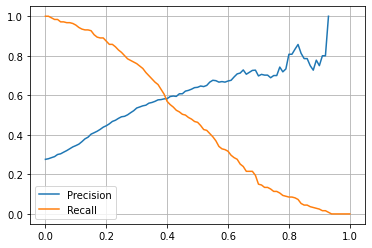

In [27]:
plt.plot(df_eval_scores.threshold, df_eval_scores.precision, label='Precision')
plt.plot(df_eval_scores.threshold, df_eval_scores.recall, label='Recall')
plt.legend()
plt.grid()

ANS Q4:

--------------------------------------------------------------------

In [28]:
round(df_eval_scores.F1.max(), 3)

0.629

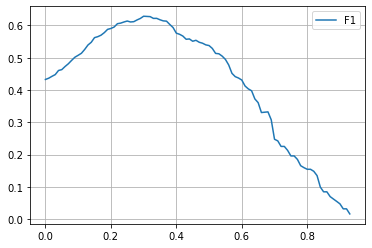

In [29]:
plt.plot(df_eval_scores.threshold, df_eval_scores.F1, label='F1')
plt.legend()
plt.grid()

Train and Predict Function

---------------------------------------------------------------------

In [ ]:
def train(df_train, y_train, col, C=1.0):
    dicts = df_train[col].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model, col):
    dicts = df[col].to_dict(orient='records')
    
    X_data = dv.transform(dicts)
    y_pred = model.predict_proba(X_data)[:, 1]

    return y_pred

ANS Q5:

------------------------------------------------------------------

In [31]:
col_cat = ['records', 'job', 'home']
col_num = ['seniority', 'income', 'assets']

In [32]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []
C = 1.0
for train_idx, val_idx in kfold.split(df_full_train):
    df_train_q5 = df_full_train.iloc[train_idx]
    df_val_q5 = df_full_train.iloc[val_idx]

    y_train_q5 = df_train_q5.default.values
    y_val_q5 = df_val_q5.default.values

    dv, model_q5 = train(df_train_q5, y_train_q5, col, C=C)
    y_pred_q5 = predict(df_val_q5, dv, model_q5, col)

    auc_q5 = roc_auc_score(y_val_q5, y_pred_q5)
    scores.append(auc_q5)

print('C = %5s | Mean = %.3f | STD = +- %.3f' % (C, np.mean(scores), np.std(scores)))

C =   1.0 | Mean = 0.814 | STD = +- 0.014


ANS Q6:

------------------------------------------------------------------------------------

In [37]:
for C in tqdm([0.01, 0.1, 1, 10]):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_q6 = df_full_train.iloc[train_idx]
        df_val_q6 = df_full_train.iloc[val_idx]

        y_train_q6 = df_train_q6.default.values
        y_val_q6 = df_val_q6.default.values

        dv, model_q6 = train(df_train_q6, y_train_q6, col, C=C)
        y_pred_q6 = predict(df_val_q6, dv, model_q6, col)

        auc_q6 = roc_auc_score(y_val_q6, y_pred_q6)
        scores.append(auc_q6)

    print('C = %5s | Mean = %.3f | STD = +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C =  0.01 | Mean = 0.809 | STD = +- 0.013
C =   0.1 | Mean = 0.813 | STD = +- 0.014
C =     1 | Mean = 0.814 | STD = +- 0.014
C =    10 | Mean = 0.813 | STD = +- 0.015
